# Pokemon Dataset Analysis
- Done by : Lujain Yousef <3
![Alt text](302141.jpg)
- Columns `Describtion`:
     - **#**: This column appears to contain a unique identifier for each entry, perhaps representing the Pokémon ID.
     - **Name**: This column contains the names of the Pokémon.
     - **Type 1**: This column contains the primary type of each Pokémon.
     - **Type 2**: This column contains the secondary type of each Pokémon. Some Pokémon may have only one type, so their Type 2 is marked as NaN (Not a Number).

     - **Total**: This column likely represents the total stats of each Pokémon, which could be the sum of HP, Attack, Defense, Special Attack, Special Defense, and Speed.

     - **HP**: This column represents the Hit Points (HP) stat of each Pokémon, indicating its health or vitality.

     - **Attack**: This column represents the Attack stat of each Pokémon, indicating its physical attack power.

     - **Defense**: This column represents the Defense stat of each Pokémon, indicating its ability to resist physical attacks.

     - **Sp. Atk**: This column represents the Special Attack stat of each Pokémon, indicating its power in special attacks (e.g., elemental attacks).

     - **Sp. Def**: This column represents the Special Defense stat of each Pokémon, indicating its ability to resist special attacks.

     - **Speed**: This column represents the Speed stat of each Pokémon, indicating its agility or how quickly it can act in battle.

     - **Generation**: This column appears to indicate the generation of each Pokémon, which is likely the generation in which it was introduced in the Pokémon series.
     
     - **Legendary**: This column indicates whether the Pokémon is legendary or not, with `True` representing legendary Pokémon and `False` representing non-legendary Pokémon.

# reading the Dataframe 

In [322]:
import pandas as pd 
df = pd.read_csv('pokemon.csv')
df

#                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  
0         65       65     45           1      False  
1         80       80     60           1      False  
2        100      100     80           1      False  
3        122      120     80           1      False  
4         60       50     65           1      False  
..       ...      ...    ...         ...        ...  
795      100      150     50           6       True  
796      160      110    110           6       True  
797      150      130     70           6       True  
798      170      130     80           6       True  
799      130       90     70           6       True  

[800 rows x 13 columns]

# drop the number col

In [275]:
df = df.drop('#',axis=1) # not usefull

# EDA

![Alt text](314780.jpg)

### check the datatypes

In [276]:
df.dtypes

Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

### check nulls 

In [277]:
df.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [278]:
df.isna().sum()/len(df) # nulls percentage

Name          0.0000
Type 1        0.0000
Type 2        0.4825
Total         0.0000
HP            0.0000
Attack        0.0000
Defense       0.0000
Sp. Atk       0.0000
Sp. Def       0.0000
Speed         0.0000
Generation    0.0000
Legendary     0.0000
dtype: float64

In [308]:
mask = df.isna().sum()/len(df) < 0.3 # making and removing nulls based on threshold 0.3
print(mask)

Name           True
Type 1         True
Type 2        False
Total          True
HP             True
Attack         True
Defense        True
Sp. Atk        True
Sp. Def        True
Speed          True
Generation     True
Legendary      True
dtype: bool


In [280]:
reduced_df = df.loc[:,mask]

In [281]:
reduced_df.shape

(800, 11)

# Encoding categorical features 

![Alt text](410000.jpg)

In [345]:
from sklearn.preprocessing import LabelEncoder 
l = LabelEncoder()
cols = ['Name','Type 1']
for col in cols:
        reduced_df[col]=l.fit_transform(df[col])
        print(reduced_df[col])

0       80
1      329
2      745
3      746
4      102
      ... 
795    160
796    161
797    314
798    315
799    756
Name: Name, Length: 800, dtype: int32
0       9
1       9
2       9
3       9
4       6
       ..
795    15
796    15
797    14
798    14
799     6
Name: Type 1, Length: 800, dtype: int32


# Correlation

![Alt text](53138.jpg)

<Axes: >

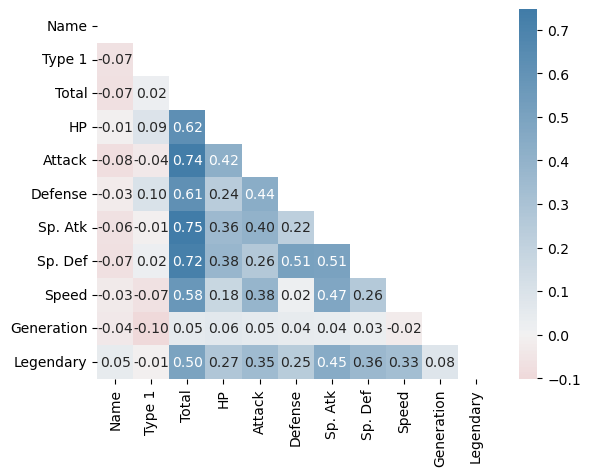

In [283]:
import numpy as np
import seaborn as sns

cmap = sns.diverging_palette(h_neg=10, h_pos=240, as_cmap=True)
corr = reduced_df.corr()
mask = np.triu(np.ones_like(corr,dtype=bool))
sns.heatmap(corr,mask=mask,center=0,cmap=cmap,annot=True,fmt='.2f')

In [284]:
corr_df = reduced_df.corr().abs()
mask = np.triu(np.ones_like(corr_df,dtype=bool))
tri_df = corr_df.mask(mask) 
tri_df

Name    Type 1     Total        HP    Attack   Defense  \
Name             NaN       NaN       NaN       NaN       NaN       NaN   
Type 1      0.067074       NaN       NaN       NaN       NaN       NaN   
Total       0.071396  0.023251       NaN       NaN       NaN       NaN   
HP          0.008356  0.094230  0.618748       NaN       NaN       NaN   
Attack      0.081029  0.037525  0.736211  0.422386       NaN       NaN   
Defense     0.025437  0.103439  0.612787  0.239622  0.438687       NaN   
Sp. Atk     0.063574  0.006694  0.747250  0.362380  0.396362  0.223549   
Sp. Def     0.069318  0.018911  0.717609  0.378718  0.263990  0.510747   
Speed       0.031623  0.066471  0.575943  0.175952  0.381240  0.015227   
Generation  0.035371  0.101129  0.048384  0.058683  0.051451  0.042419   
Legendary   0.047575  0.010162  0.501758  0.273620  0.345408  0.246377   

             Sp. Atk   Sp. Def     Speed  Generation  Legendary  
Name             NaN       NaN       NaN         NaN        NaN  
Type 1           NaN       NaN       NaN         NaN        NaN  
Total            NaN       NaN       NaN         NaN        NaN  
HP               NaN       NaN       NaN         NaN        NaN  
Attack           NaN       NaN       NaN         NaN        NaN  
Defense          NaN       NaN       NaN         NaN        NaN  
Sp. Atk          NaN       NaN       NaN         NaN        NaN  
Sp. Def     0.506121       NaN       NaN         NaN        NaN  
Speed       0.473018  0.259133       NaN         NaN        NaN  
Generation  0.036437  0.028486  0.023121         NaN        NaN  
Legendary   0.448907  0.363937  0.326715    0.079794        NaN

In [285]:
to_drop = [c for c in tri_df.columns if any(tri_df[c]>0.8)] # threshold 0.8
print(to_drop)
reduced_df = reduced_df.drop(to_drop,axis=1)
reduced_df.shape

[]


(800, 11)

In [286]:
reduced_df['Legendary'].unique()    # target col unique vals

array([False,  True])

# Classification model 
- to predict if its legendary or not
- I apply `XGBoost` & `RandomForest`

### XGBoostClassifier 

In [349]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = reduced_df.drop(['Name','Legendary'],axis=1)
y = reduced_df['Legendary']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [347]:
from sklearn.ensemble import RandomForestClassifier
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=0.9)),  # num of components is 90% of the variance 
        ('classifier', XGBClassifier())])
# Fit the pipeline to the training data
pipe.fit(X_train,y_train)

# Prints the explained variance ratio
print(pipe['reducer'].explained_variance_ratio_)

# Score the accuracy on the test set
accuracy = pipe.score(X_test,y_test)

# Prints the model accuracy
print(f'{accuracy:.1%} test set accuracy')

[0.41513735 0.13104307 0.11874901 0.0961309  0.0844271  0.07812034]
98.1% test set accuracy


![Alt text](53143.jpg)

### Random forest using pipeline

- standardization : `standardscaler`
- dim reduction : `pca`
- apply `RF` classifier 

In [318]:
from sklearn.ensemble import RandomForestClassifier
# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=0.9)),  # num of components is 90% of the variance 
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train,y_train)

# Prints the explained variance ratio
print(pipe['reducer'].explained_variance_ratio_)

[0.41513735 0.13104307 0.11874901 0.0961309  0.0844271  0.07812034]


In [319]:
# Score the accuracy on the test set
accuracy = pipe.score(X_test,y_test)

# Prints the model accuracy
print(f'{accuracy:.1%} test set accuracy')

96.2% test set accuracy


# The End 
![Alt text](115039.jpg)